In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Gaussian1DKernel

In [17]:
star1 = lk.search_lightcurve('KIC 893507', quarter=10).download(flux_column='sap_flux')
# star1 = lk.search_lightcurve('TIC 99180739',sector=10,author='SPOC').download(flux_column='sap_flux')
# ffi1 = lk.search_tesscut('TIC 396696273', sector=3).download(cutout_size=(11,11))



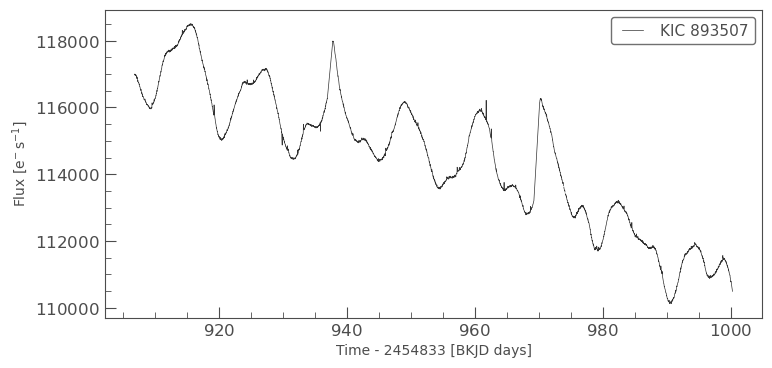

In [18]:
# %matplotlib notebook
star1.plot()
plt.show()

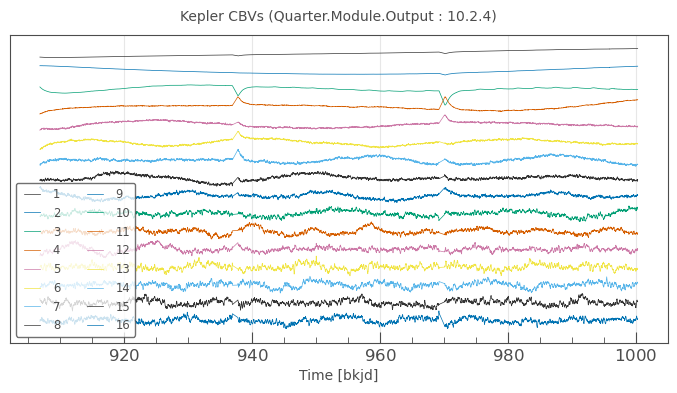

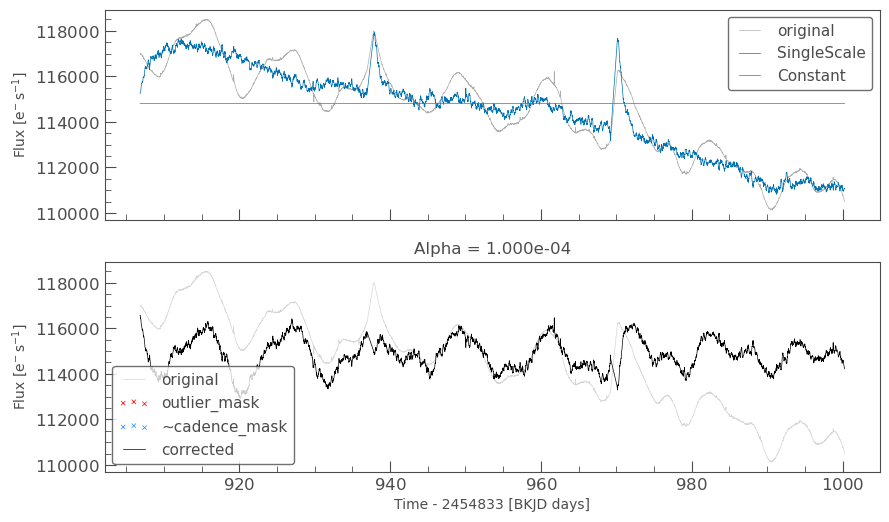

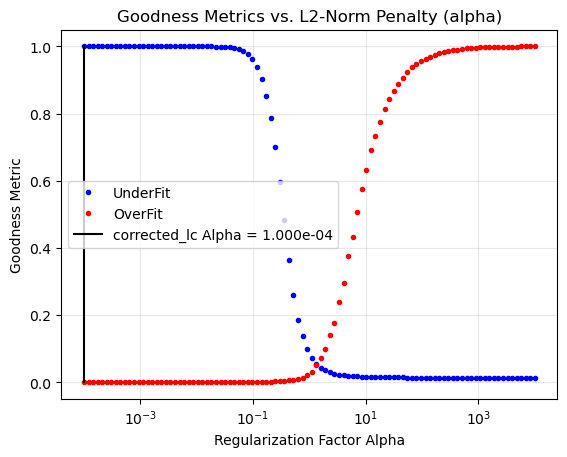

Over fitting Metric: 0.0004536114227869629
Under fitting Metric: 0.9998410158466162


In [21]:

from lightkurve.correctors import CBVCorrector
cbvCorrector = CBVCorrector(star1)#,interpolate_cbvs=True)

cbvCorrector.cbvs
cbvCorrector.cbvs[0].plot()
plt.show()

# for FFI TESS light curves, we need to bin the CBVs which were made for short cadence TPFs
# cbvs_interpolated = cbvCorrector.interpolate(star1, extrapolate=True)
# print(type(cbvs_interpolated))
# # print(np.all(tpf1.cadenceno == cbvs_interpolated.cadenceno))

cbv_type = ['SingleScale']
# Select which CBV indices to use
cbv_indices = [np.arange(1,17)]#, 'ALL'] # for kepler
# cbv_indices = [np.arange(1,9)]#, 'ALL'] # for TESS
# Perform the correction
cbvCorrector.correct_gaussian_prior(cbv_type=cbv_type, cbv_indices=cbv_indices, 
                                    alpha=1e-4)
cbvCorrector.diagnose();
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);
plt.show()

print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))

# cbvCorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices);
# cbvCorrector.diagnose();
# cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);



Optimized Over-fitting metric: 0.0006884486532702217
Optimized Under-fitting metric: 0.9927820574858135
Optimized Alpha: 5.147e-02


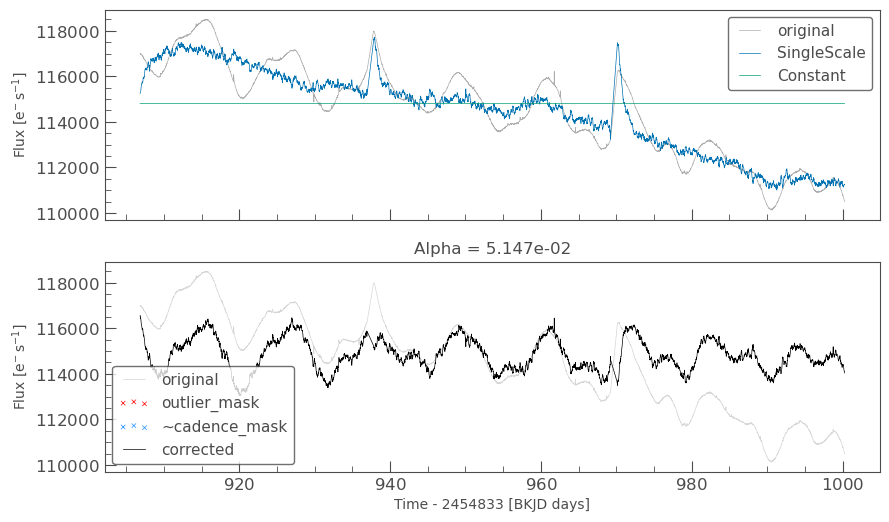

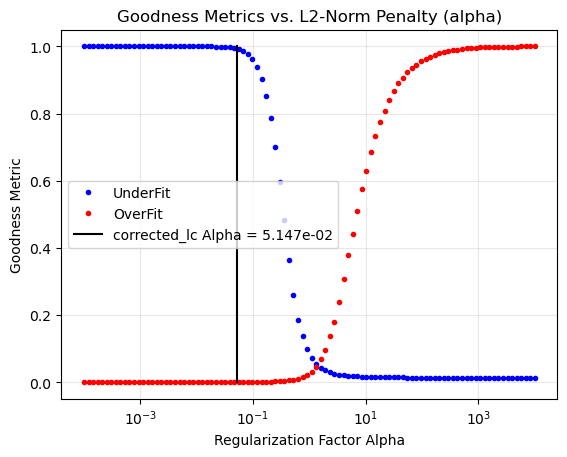

Over fitting Metric: 0.0007115944332744225
Under fitting Metric: 0.9927820574858135


In [24]:
# let's see if we can optimize this further

corr_lc = cbvCorrector.correct(cbv_type=cbv_type,
                               cbv_indices=cbv_indices,
                               alpha_bounds=[1e-4, 1e-1])                               
#                      target_over_score=0+5/1000,
#                      target_under_score=1-5/1000)
cbvCorrector.diagnose()

cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);
plt.show()
print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))


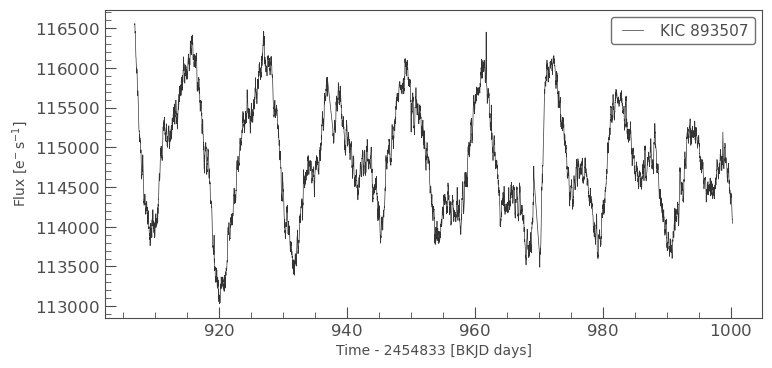

In [25]:
corr_lc.plot()
plt.show()

In [20]:
# cbvs_interpolated = cbvCorrector.interpolate(star1, extrapolate=True)

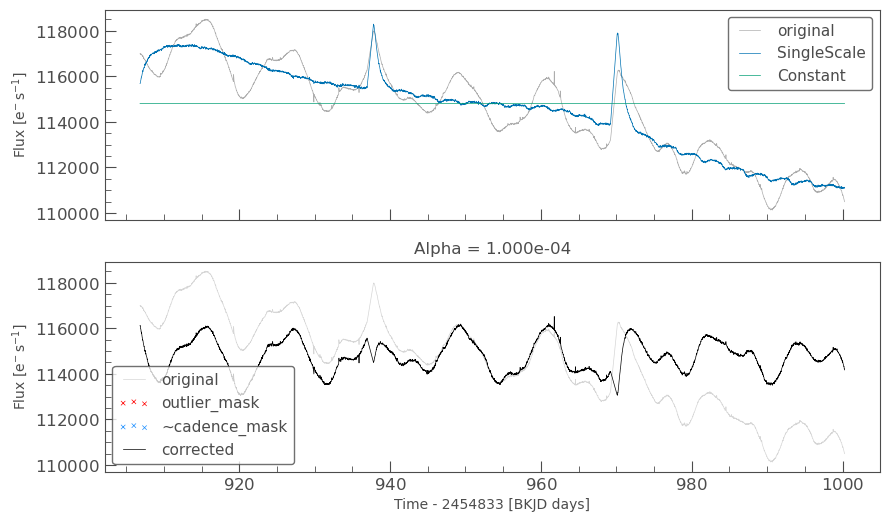

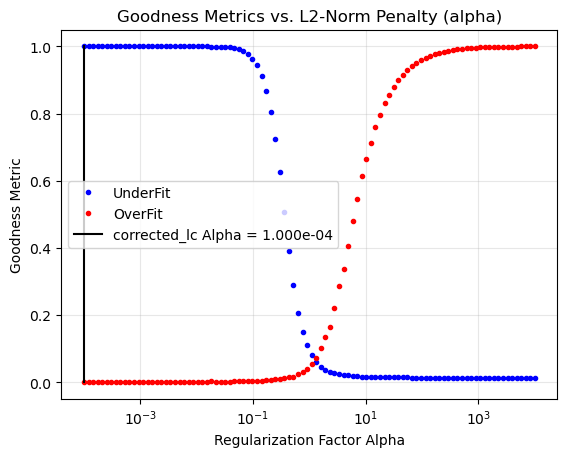

Over fitting Metric: 0.0019324959357555583
Under fitting Metric: 0.9997609689990338


In [16]:


# for FFI TESS light curves, we need to bin the CBVs which were made for short cadence TPFs
# cbvs_interpolated = cbvCorrector.interpolate(star1, extrapolate=True)
# print(type(cbvs_interpolated))
# # print(np.all(tpf1.cadenceno == cbvs_interpolated.cadenceno))

cbv_type = ['SingleScale']#, 'Spike']
# Select which CBV indices to use
# Use the first 8 SingleScale and all Spike CBVS
# cbv_indices = [np.arange(1,17)]#, 'ALL'] # for kepler
cbv_indices = [np.arange(1,9)]#, 'ALL'] # for TESS


# Perform the correction
cbvCorrector.correct_gaussian_prior(cbv_type=cbv_type, cbv_indices=cbv_indices, 
                                    alpha=1e-4)
cbvCorrector.diagnose();
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);
plt.show()

print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))


In [54]:
# cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);
# plt.show()
print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))

Over fitting Metric: 6.456420396635199e-20
Under fitting Metric: 1.0


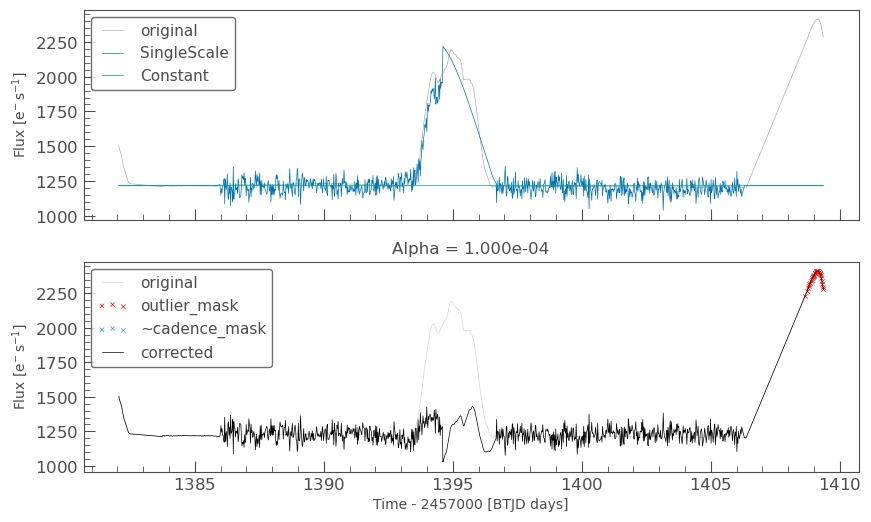

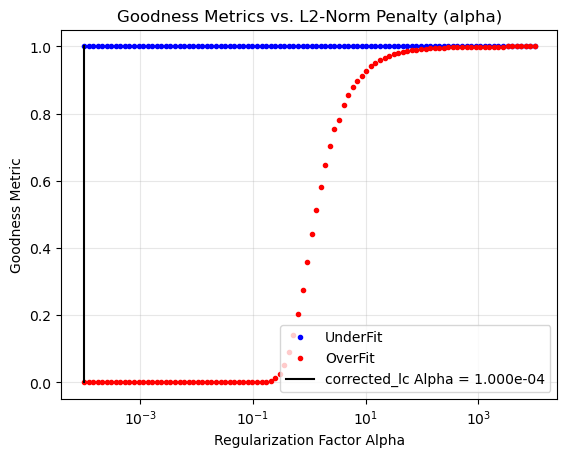

Over fitting Metric: 4.9666014365706323e-20
Under fitting Metric: 1.0


In [55]:
# cbvCorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices);
cbvCorrector.diagnose();
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);
plt.show()
print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))

Optimized Over-fitting metric: 0.0026666863486799874
Optimized Under-fitting metric: 0.7259978987582929
Optimized Alpha: 2.355e-01


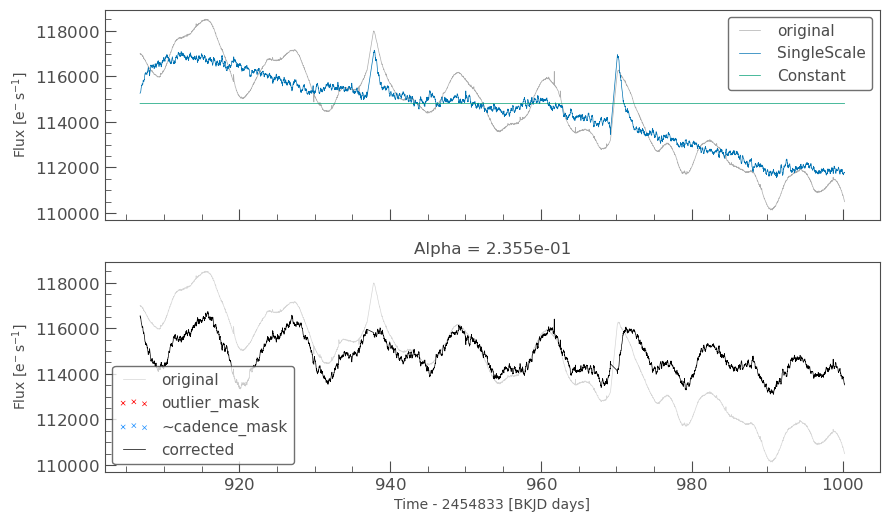

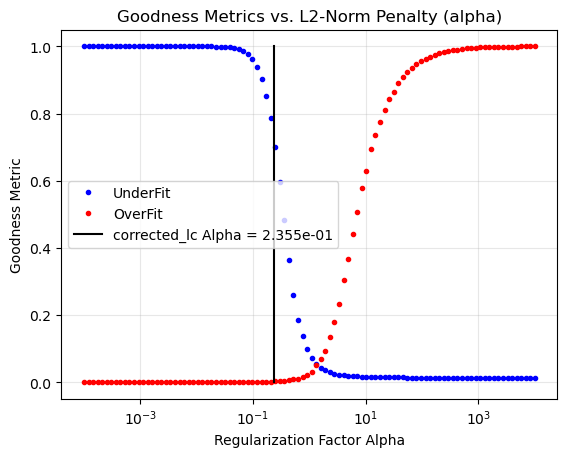

Over fitting Metric: 0.00248097922212234
Under fitting Metric: 0.7259978987582929


In [19]:
corr_lc = cbvCorrector.correct(cbv_type=cbv_type,
                               cbv_indices=cbv_indices,
                               alpha_bounds=[0.0001, 1.0])                               
#                      target_over_score=0+5/1000,
#                      target_under_score=1-5/1000)
cbvCorrector.diagnose()

cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);
plt.show()
print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))

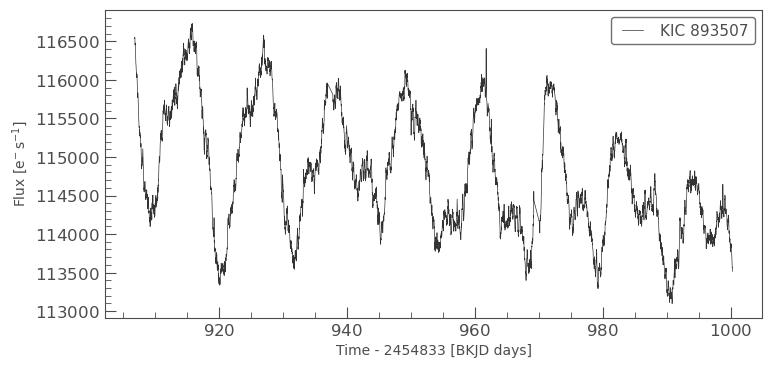

In [20]:
# %matplotlib notebook
corr_lc.plot()
plt.show()

# following CBV tutorial: https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-2-how-to-use-cbvs.html

# and: https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-how-to-use-cbvcorrector.html